In [1]:
import bisect
import matplotlib.pyplot as plt

class TaxCalculator:
    
    def __init__(self, income, year=2025):
        self.social_rate = 0.062
        self.medicare_rate = 0.0145
        self.additional_medicare_rate = 0.009
        self.medicare_cap = 250000
        self.year = year
        self.my_income = income
        if year == 2025:
            self.brackets = [0, 23850, 96950, 206700, 394600, 501050, 751600]
            self.rates = [0.1, 0.12, 0.22, 0.24, 0.32, 0.35, 0.37]
            self.social_cap = 176100
            self.deduct = 30000
        elif year == 2024:
            self.brackets = [0, 23200, 94300, 201050, 383900, 487450, 731201]
            self.rates = [0.1, 0.12, 0.22, 0.24, 0.32, 0.35, 0.37]
            self.social_cap = 168600
            self.deduct = 29200
        else:
            raise Exception("NOT SUPPORTED")
        self.add_tax = self._compute_add_tax()

    
    def _compute_add_tax(self):
        delta = [self.brackets[i] - self.brackets[i-1] for i in range(1, len(self.brackets))]
        res = [0]
        cur = 0
        for (d, r) in zip(delta, self.rates):
            cur += d * r
            res.append(cur)
        return res

    
    def get_tax_summary(self):
        print(f"Your income: ${self.my_income}")
        print(f"Standard deduction: ${self.deduct}")
        print(f"Taxable income: ${self.my_income-self.deduct}\n")
        fed = self._compute_fed_tax(self.my_income)
        fica = self._compute_fica_tax(self.my_income)
        total = fed + fica[0] + fica[1]
        print(f"Tax estimation:\n")
        print(f"\t Federal: ${fed:.2f}, {fed/self.my_income*100:.2f}%")
        print(f"\t FICA: ${fica[0]+fica[1]:.2f}, {(fica[0]+fica[1])/self.my_income*100:.2f}%")
        print(f"\t\t Social: ${fica[0]:.2f}, {fica[0]/self.my_income*100:.2f}%")
        print(f"\t\t Medicare: ${fica[1]:.2f}, {fica[1]/self.my_income*100:.2f}%")
        print(f"\t Total: ${total:.2f}, {total/self.my_income*100:.2f}%")
        
    
    def _compute_fed_tax(self, income):
        taxable = income - self.deduct
        if taxable <= 0:
            return 0
        idx = bisect.bisect_left(self.brackets, taxable)
        tax = self.add_tax[idx-1] + (taxable - self.brackets[idx-1]) * self.rates[idx-1]
        return tax

    
    def _compute_fica_tax(self, income):
        taxable = income - self.deduct
        if taxable <= 0:
            return (0, 0)
        social_tax = min(taxable, self.social_cap) * self.social_rate
        medicare_tax = taxable * self.medicare_rate + max(0, taxable - self.medicare_cap) * (self.medicare_rate + self.additional_medicare_rate)
        tax = social_tax + medicare_tax
        return (social_tax, medicare_tax)
        

    def _compute_income_tax(self, income):
        fed = self._compute_fed_tax(income)
        fica = self._compute_fica_tax(income)
        return fed + fica[0] + fica[1]


    def _plot(self, x, y, title):
        fig, ax1 = plt.subplots()

        rates = [y_/x_*100 if x_ != 0 else 0 for (y_, x_) in zip(y, x)]
        color = 'tab:orange'
        ax1.set_xlabel('Income ($)')
        ax1.set_ylabel('Effective Tax Rate (%)', color=color)
        ax1.plot(x, rates, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()
        color = 'tab:blue'
        ax2.set_ylabel('Tax ($)', color=color)
        ax2.plot(x, y, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()
        plt.ticklabel_format(style='plain', axis='x', useMathText=True)
        plt.grid(axis='both')
        plt.title(f'{title} in {self.year}')
        ax2.vlines(self.my_income, 0, 1, transform=ax2.get_xaxis_transform(), colors='r')
        plt.show()


    def plot(self, max_income=1000000):
        self.plot_fed_tax(max_income)
        self.plot_fica_tax(max_income)
        self.plot_income_tax(max_income)

        
    def plot_fed_tax(self, max_income=1000000):
        data = [x for x in range(max_income)]
        y_tax = [self._compute_fed_tax(x) for x in data]
        self._plot(data, y_tax, "Federal Tax")
        
    
    def plot_fica_tax(self, max_income=1000000, breakdown=False):
        data = [x for x in range(max_income)]
        fica_tax = [self._compute_fica_tax(x) for x in data]
        social_tax = [t[0] for t in fica_tax]
        medicare_tax = [t[1] for t in fica_tax]
        if breakdown:
            self._plot(data, social_tax, "FICA Tax (Social)")
            self._plot(data, medicare_tax, "FICA Tax (Medicare)")
        else:
            y_tax = [t[0] + t[1] for t in fica_tax]
            self._plot(data, y_tax, "FICA Tax")


    def plot_income_tax(self, max_income=1000000):
        data = [x for x in range(max_income)]
        y_tax = [self._compute_income_tax(x) for x in data]
        self._plot(data, y_tax, "Income Tax")    


## Tax Year 2024

In [2]:
income = 251431.45
cal_2024 = TaxCalculator(income, 2024)

In [3]:
cal_2024.get_tax_summary()

Your income: $251431.45
Standard deduction: $29200
Taxable income: $222231.45

Tax estimation:

	 Federal: $39420.55, 15.68%
	 FICA: $13675.56, 5.44%
		 Social: $10453.20, 4.16%
		 Medicare: $3222.36, 1.28%
	 Total: $53096.10, 21.12%


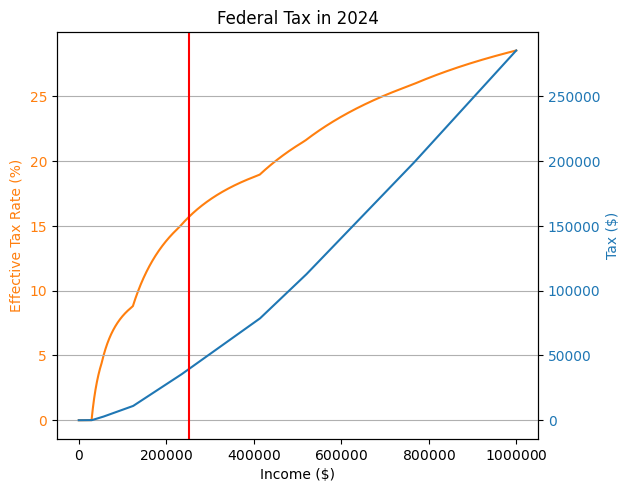

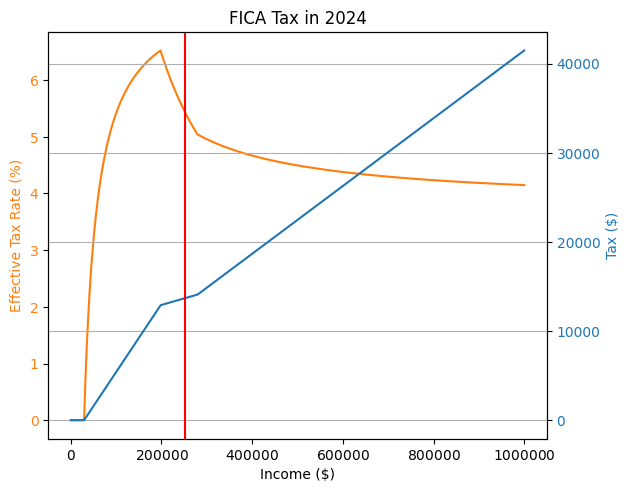

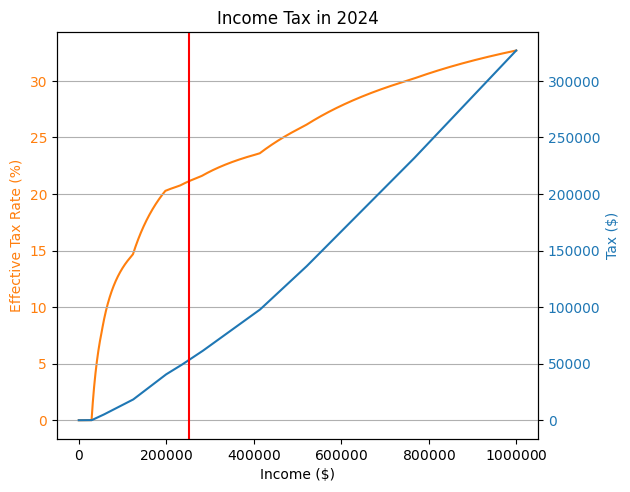

In [4]:
cal_2024.plot()

## Tax Year 2025

In [5]:
income = 300000
cal_2025 = TaxCalculator(income, 2025)

In [6]:
cal_2025.get_tax_summary()

Your income: $300000
Standard deduction: $30000
Taxable income: $270000

Tax estimation:

	 Federal: $50494.00, 16.83%
	 FICA: $15303.20, 5.10%
		 Social: $10918.20, 3.64%
		 Medicare: $4385.00, 1.46%
	 Total: $65797.20, 21.93%


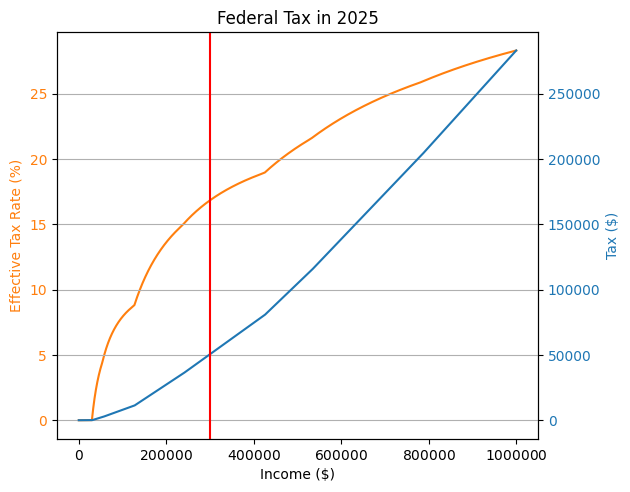

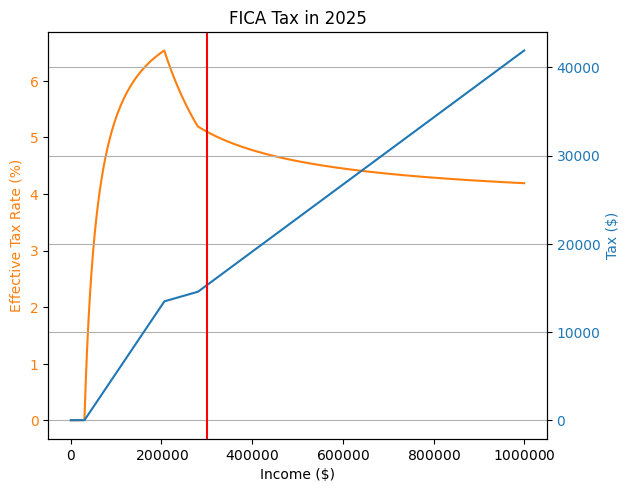

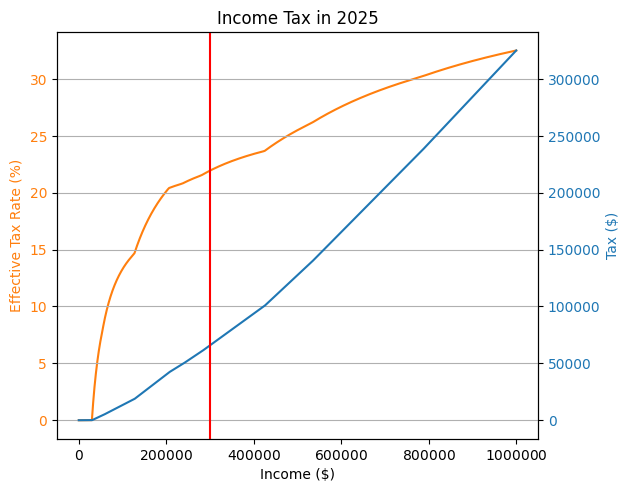

In [7]:
cal_2025.plot()